/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_10614/2457894032.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['year'] = top_df['year'].astype(int)


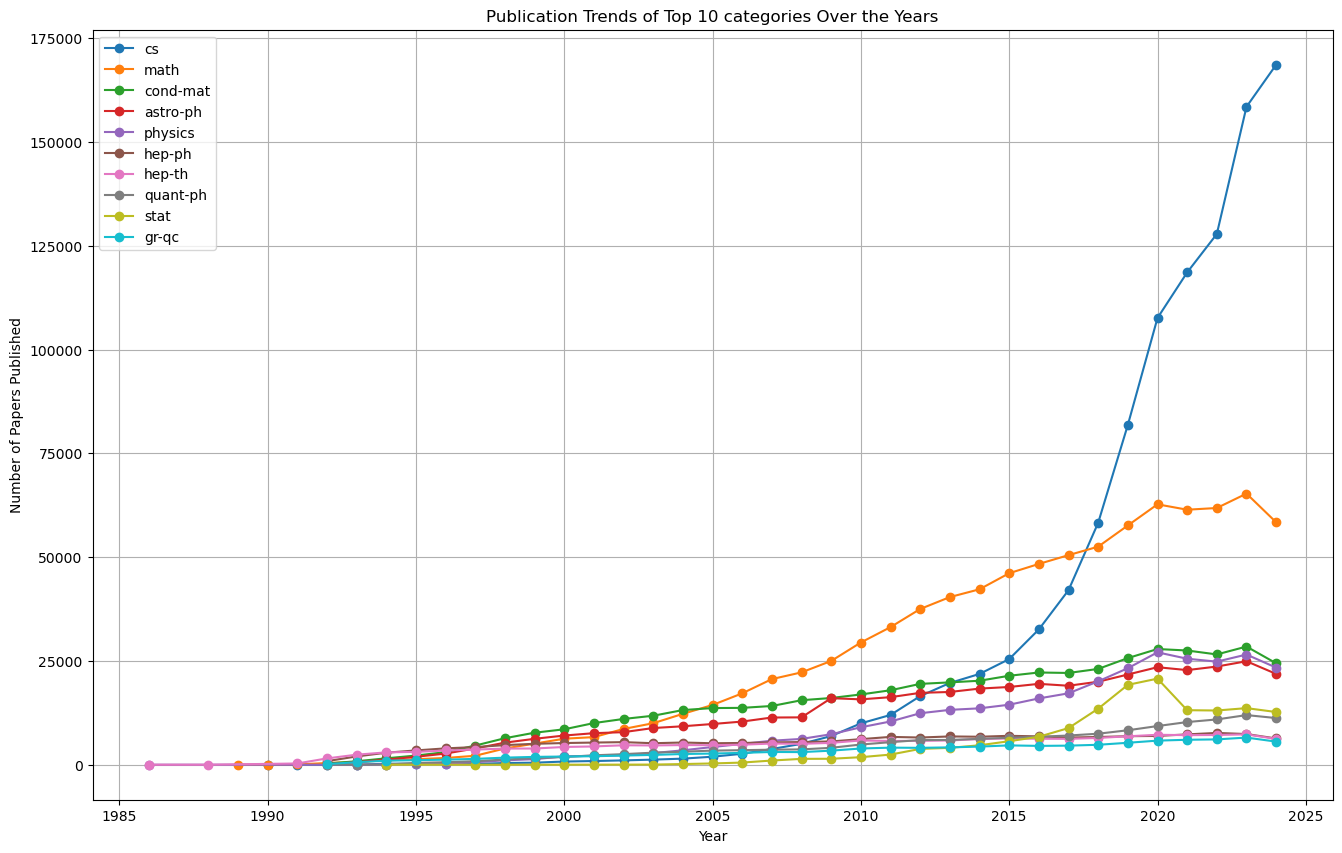

In [9]:
import json
from matplotlib import pyplot as plt
import pandas as pd

# Load the JSON data from the file
with open('../spark_output/category_paper_yearly_count.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# Create a DataFrame from the loaded data
df = pd.DataFrame(data)

# Find the top 10 categorys with the most published papers
top_categories = df.groupby('main_category')['count'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 categorys
top_df = df[df['main_category'].isin(top_categories)]

# Convert 'year' column to integer for correct plotting
top_df['year'] = top_df['year'].astype(int)


# Plot the data
plt.figure(figsize=(16, 10))
for category in top_categories:
    category_data = top_df[top_df['main_category'] == category].sort_values(by='year')
    plt.plot(category_data['year'], category_data['count'], marker='o', label=category)

plt.xlabel('Year')
plt.ylabel('Number of Papers Published')
plt.title('Publication Trends of Top 10 categories Over the Years')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_7490/2292615806.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['year'] = top_df['year'].astype(int)


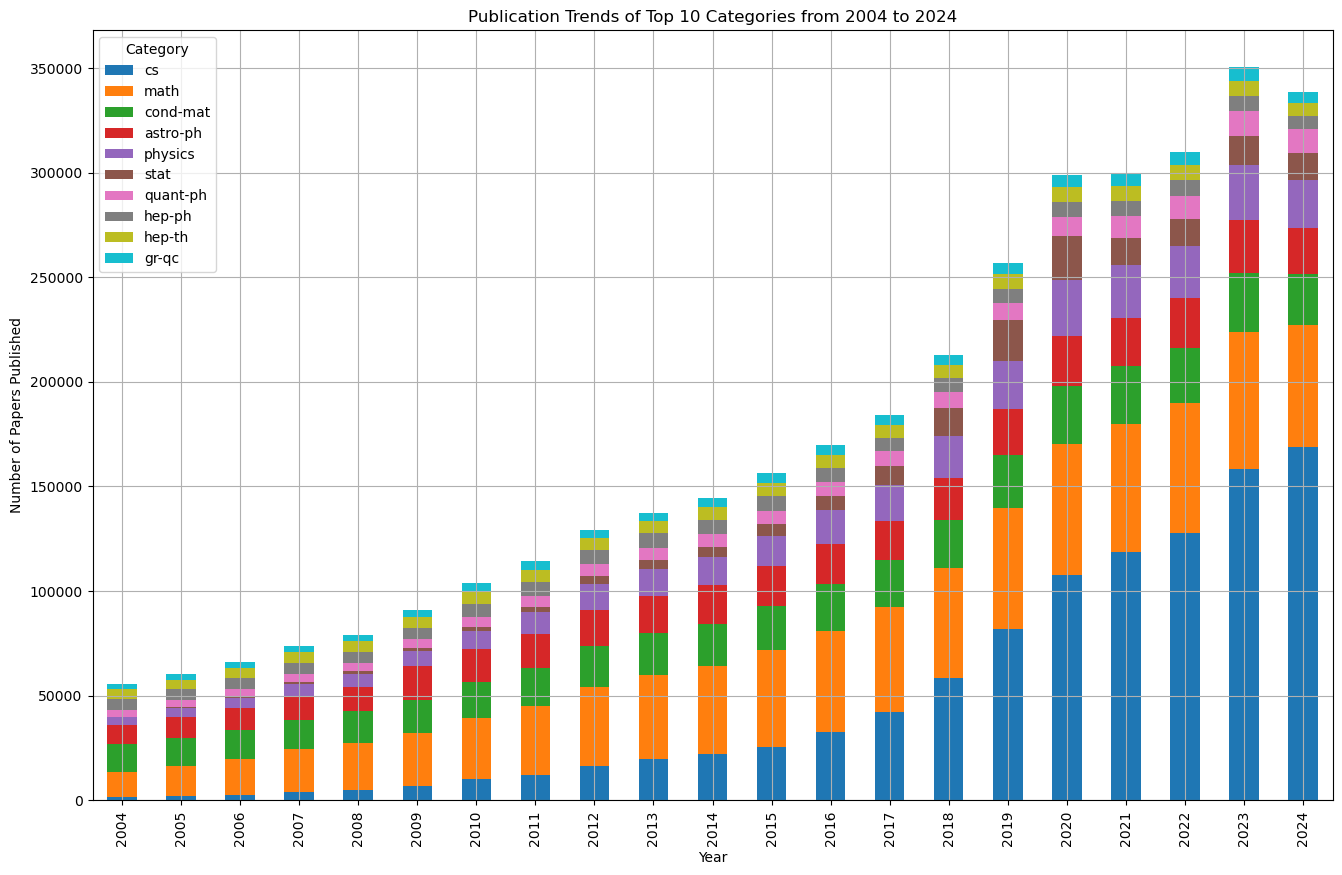

In [ ]:
import json
from matplotlib import pyplot as plt
import pandas as pd

# Load the JSON data from the file
with open('../spark_output/category_paper_yearly_count.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)

# Find the top 10 categories with the most published papers
top_categories = df.groupby('main_category')['count'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
top_df = df[df['main_category'].isin(top_categories)]

# Convert 'year' column to integer for correct plotting
top_df['year'] = top_df['year'].astype(int)

# Limit the year range
start_year = 2004
end_year = 2024
top_df = top_df[(top_df['year'] >= start_year) & (top_df['year'] <= end_year)]

# Pivot the DataFrame to get years as index and categories as columns
pivot_df = top_df.pivot(index='year', columns='main_category', values='count').fillna(0)

# Sort the columns by the total count of each category
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Plot the data using a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(16, 10))

plt.xlabel('Year')
plt.ylabel('Number of Papers Published')
plt.title(f'Publication Trends of Top 10 Categories from {start_year} to {end_year}')
plt.legend(title='Category')
plt.grid(True)
plt.show()


/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_10614/2610553205.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['year'] = top_df['year'].astype(int)


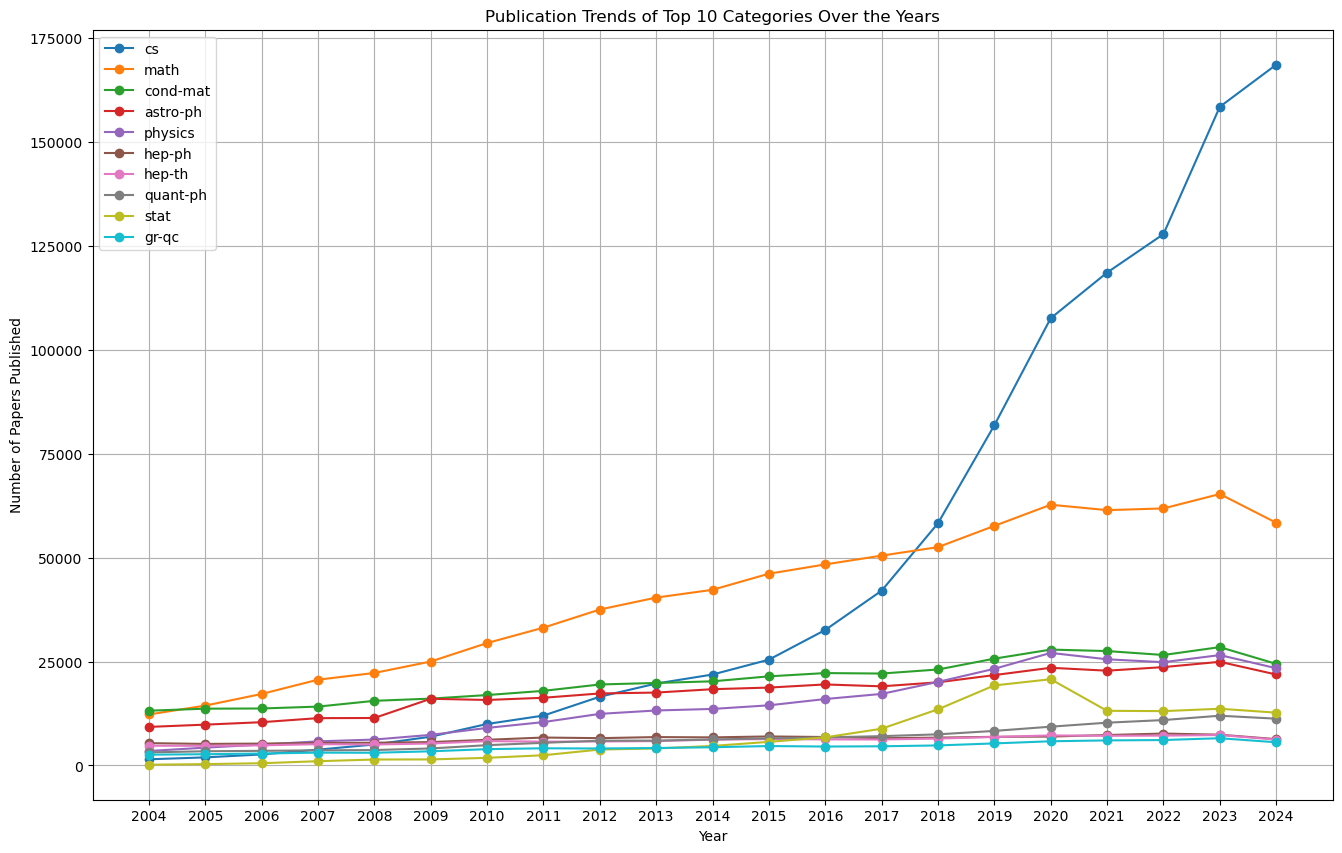

In [7]:
import json
from matplotlib import pyplot as plt
import pandas as pd

# Load the JSON data from the file
with open('../spark_output/category_paper_yearly_count.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# Create a DataFrame from the loaded data
df = pd.DataFrame(data)

# Find the top 10 categories with the most published papers
top_categories = df.groupby('main_category')['count'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
top_df = df[df['main_category'].isin(top_categories)]

# Convert 'year' column to integer for correct plotting
top_df['year'] = top_df['year'].astype(int)

# Define the year range you want to plot
start_year = 2004
end_year = 2024

# Filter the DataFrame to include only the years within the specified range
top_df = top_df[(top_df['year'] >= start_year) & (top_df['year'] <= end_year)]

# Plot the data
plt.figure(figsize=(16, 10))
for category in top_categories:
    category_data = top_df[top_df['main_category'] == category].sort_values(by='year')
    plt.plot(category_data['year'], category_data['count'], marker='o', label=category)

plt.xlabel('Year')
plt.ylabel('Number of Papers Published')
plt.title('Publication Trends of Top 10 Categories Over the Years')
plt.legend()
plt.grid(True)
plt.xticks(range(start_year, end_year + 1))  # Ensure x-axis ticks are integers
plt.show()
